In [58]:
%reset
import os
os.chdir('/Users/saulgarcia/Dropbox/Maestria/DMKM/Courses/SEM3/SNLP/Exercies/SNLP/Lab1')
print os.getcwd()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
/Users/saulgarcia/Dropbox/Maestria/DMKM/Courses/SEM3/SNLP/Exercies/SNLP/Lab1


In [59]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import FreqDist

import pandas as pd
import numpy as np

import string

import warnings
warnings.filterwarnings('ignore')

In [60]:
# Read text files
en = open("data/en.txt").read()
es = open("data/es.txt").read() #.decode('string-escape').decode("utf-8")

# Remove punctuation
en = en.translate(None, string.punctuation)
es = es.translate(None, string.punctuation)

# Tokenize the files 
en_tokens = word_tokenize(en)
es_tokens = word_tokenize(es)

In [61]:
# FreqDist for the Tokens
en_freq = FreqDist(en_tokens)
es_freq = FreqDist(es_tokens)

In [62]:
from collections import Counter

# Create a Dataframe from Enlgish corpus
df_en = pd.DataFrame.from_dict(en_freq, orient='index').reset_index()
df_en = df_en.rename(columns={'index':'word', 0:'count'})
df_en = df_en.sort(['count'], ascending=[False])
df_en['rank'] = df_en['count'].rank(ascending=False).apply(lambda x: int(x))
df_en.head()

,word,count,rank
15039,the,45989,1
21557,of,25607,2
24513,to,24870,3
39380,a,21347,4
21236,and,17807,5


In [63]:
# Create a Dataframe from Spanish corpus
df_es = pd.DataFrame.from_dict(es_freq, orient='index').reset_index()
df_es = df_es.rename(columns={'index':'word', 0:'count'})
df_es = df_es.sort(['count'], ascending=[False])
df_es['rank'] = df_es['count'].rank(ascending=False).apply(lambda x: int(x))
df_es.head()

,word,count,rank
13643,de,32987,1
18090,la,18570,2
7519,que,16285,3
14154,el,14640,4
14155,en,12996,5


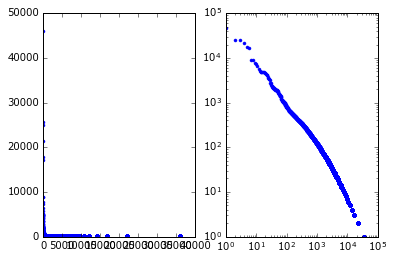

In [64]:
# Plotting the Frequencies against the Ranks

#English Text
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2)
plt.figure(figsize=(8, 4))

ax[0].plot(df_en['rank'], df_en['count'],'.')
#plt.title('Center Title')

ax[1].loglog(df_en['rank'],df_en['count'],'.')
fig.show()



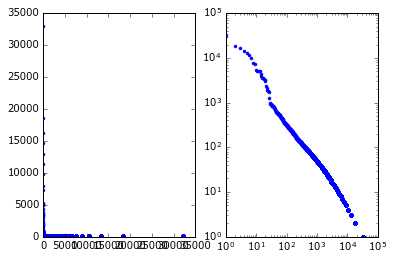

In [65]:
#Spanish Text
fig,ax = plt.subplots(1,2)
plt.figure(figsize=(8, 4))

ax[0].plot(df_es['rank'], df_es['count'],'.')
#plt.title('Center Title')

ax[1].loglog(df_es['rank'],df_es['count'],'.')
fig.show()

52795.0824663
521402295.049
249486.054608
4.62135831554e+13


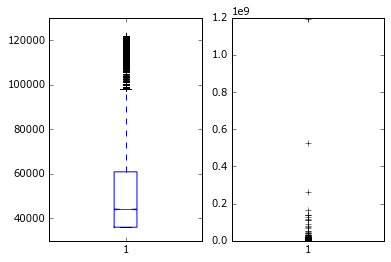

In [66]:
# Proportionality Constant (K) for Zipfs Law  f=K/r

df_en['K'] = df_en['count']*df_en['rank']
df_es['K'] = df_es['count']*df_en['rank']

#Plot
fig,ax = plt.subplots(1,2)
plt.figure(figsize=(8, 4))

ax[0].boxplot(df_en['K'],'-')
#plt.title('Center Title')

ax[1].boxplot(df_es['K'],'-')
fig.show()

#Mean and Variance for the Proportionality Constant K
print df_en['K'].mean()
print df_en['K'].var()

print df_es['K'].mean()
print df_es['K'].var()

## Repeat the Process, work on the tokenization method:

In [67]:
# Remove numbers
es2 = es.translate(None, '0123456789')
en2 = en.translate(None, '0123456789')

# Lower case
es2 = es2.lower()
en2 = en2.lower()

Tokenization and plotting

In [68]:
# Tokenize the files 
en_tokens = word_tokenize(en2)
es_tokens = word_tokenize(es2)

# FreqDist for the Tokens
en_freq = FreqDist(en_tokens)
es_freq = FreqDist(es_tokens)

# Create a Dataframe from Enlgish corpus
df_en = pd.DataFrame.from_dict(en_freq, orient='index').reset_index()
df_en = df_en.rename(columns={'index':'word', 0:'count'})
df_en = df_en.sort(['count'], ascending=[False])
df_en['rank'] = df_en['count'].rank(ascending=False).apply(lambda x: int(x))
df_en.head()

,word,count,rank
11886,the,53753,1
17217,of,25691,2
19549,to,25049,3
31151,a,22508,4
14194,in,19033,5


In [69]:
# Create a Dataframe from Spanish corpus
df_es = pd.DataFrame.from_dict(es_freq, orient='index').reset_index()
df_es = df_es.rename(columns={'index':'word', 0:'count'})
df_es = df_es.sort(['count'], ascending=[False])
df_es['rank'] = df_es['count'].rank(ascending=False).apply(lambda x: int(x))
df_es.head()

,word,count,rank
12098,de,33252,1
16136,la,20454,2
37830,el,17673,3
6666,que,16327,4
12588,en,14008,5


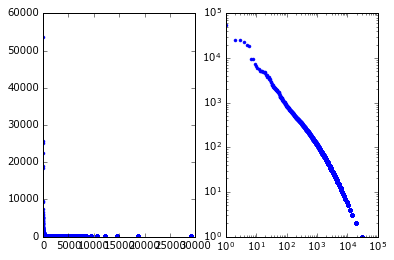

In [70]:
# Plotting the Frequencies against the Ranks

#English Text
fig,ax = plt.subplots(1,2)
plt.figure(figsize=(8, 4))

ax[0].plot(df_en['rank'], df_en['count'],'.')
#plt.title('Center Title')

ax[1].loglog(df_en['rank'],df_en['count'],'.')
fig.show()


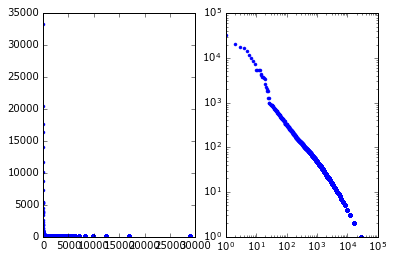

In [71]:
#Spanish Text
fig,ax = plt.subplots(1,2)
plt.figure(figsize=(8, 4))

ax[0].plot(df_es['rank'], df_es['count'],'.')
#plt.title('Center Title')

ax[1].loglog(df_es['rank'],df_es['count'],'.')
fig.show()

47224.4758537
554211379.099
242412.275176
4.93269231478e+13


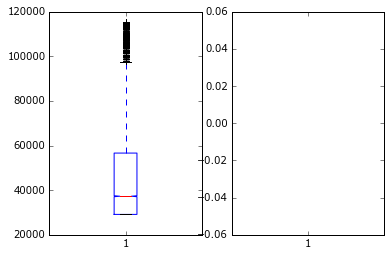

In [72]:
# Proportionality Constant (K) for Zipfs Law  f=K/r

df_en['K'] = df_en['count']*df_en['rank']
df_es['K'] = df_es['count']*df_en['rank']

#Plot
fig,ax = plt.subplots(1,2)
plt.figure(figsize=(8, 4))

ax[0].boxplot(df_en['K'],'-')
#plt.title('Center Title')

ax[1].boxplot(df_es['K'],'-')
fig.show()

#Mean and Variance for the Proportionality Constant K
print df_en['K'].mean()
print df_en['K'].var()

print df_es['K'].mean()
print df_es['K'].var()

## Tokenize by character

In [73]:
en3 = ''.join(en)
es3 = ''.join(es)

en_dic = {}
for i in en3:
    if i not in en_dic:
        en_dic[i] = 1
    else:
        en_dic[i] = en_dic[i] + 1


es_dic = {}
for i in es3:
    if i not in es_dic:
        es_dic[i] = 1
    else:
        es_dic[i] = es_dic[i] + 1

In [81]:
# Convert into a dataframe
#English
df_en = pd.DataFrame.from_dict(en_dic, orient='index').reset_index()
df_en = df_en.rename(columns={'index':'character', 0:'frequency'})
df_en = df_en.sort(['frequency'], ascending=[False])
df_en['rank'] = df_en['frequency'].rank(ascending=False).apply(lambda x: int(x))
df_en.head()

,character,frequency,rank
1,,926106,1
41,e,521085,2
58,t,376151,3
38,a,358870,4
51,o,325166,5


In [80]:
#Spanish
df_es = pd.DataFrame.from_dict(es_dic, orient='index').reset_index()
df_es = df_es.rename(columns={'index':'character', 0:'frequency'})
df_es = df_es.sort(['frequency'], ascending=[False])
df_es['rank'] = df_es['frequency'].rank(ascending=False).apply(lambda x: int(x))
df_es.head()

,character,frequency,rank
2,,482373,1
88,e,295057,2
87,a,272738,3
40,o,190579,4
41,s,162900,5


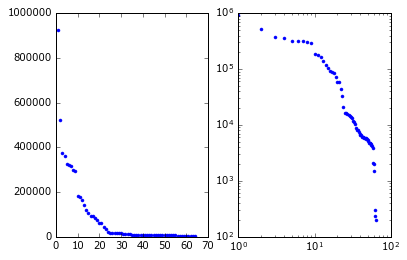

In [83]:
# Plotting the Frequencies against the Ranks

#English Text
fig,ax = plt.subplots(1,2)
plt.figure(figsize=(8, 4))

ax[0].plot(df_en['rank'], df_en['frequency'],'.')
#plt.title('Center Title')

ax[1].loglog(df_en['rank'],df_en['frequency'],'.')
fig.show()


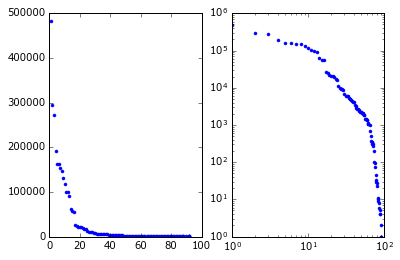

In [84]:
#Spanish Text
fig,ax = plt.subplots(1,2)
plt.figure(figsize=(8, 4))

ax[0].plot(df_es['rank'], df_es['frequency'],'.')
#plt.title('Center Title')

ax[1].loglog(df_es['rank'],df_es['frequency'],'.')
fig.show()

741126.359375
4.80769929863e+11
805507.375
4.64532786879e+12


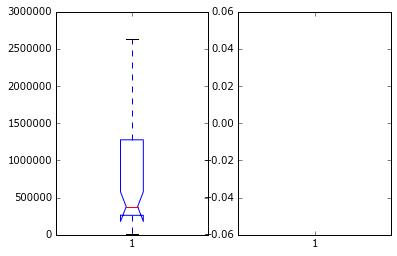

In [86]:
# Proportionality Constant (K) for Zipfs Law  f=K/r

df_en['K'] = df_en['frequency']*df_en['rank']
df_es['K'] = df_es['frequency']*df_en['rank']

#Plot
fig,ax = plt.subplots(1,2)
plt.figure(figsize=(8, 4))

ax[0].boxplot(df_en['K'],'-')
#plt.title('Center Title')

ax[1].boxplot(df_es['K'],'-')
fig.show()

#Mean and Variance for the Proportionality Constant K
print df_en['K'].mean()
print df_en['K'].var()

print df_es['K'].mean()
print df_es['K'].var()